# Notebook to extract embeddings from Glove 

In [1]:
import os
import glob
import torch
import numpy as np
import pandas as pd
from tqdm import tqdm
from model import GloveExtractor
from modeling_hacked_glove import Glove
from tokenizer import tokenize
from utils import set_seed
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from numpy import linalg as la

%matplotlib notebook
from ipywidgets import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx
import matplotlib

In [2]:
def check_folder(path):
    """Create adequate folders if necessary."""
    try:
        if not os.path.isdir(path):
            check_folder(os.path.dirname(path))
            os.mkdir(path)
    except:
        pass

In [3]:
def transform(activations, path, name, run_index, embedding_size=300):
    assert activations.values.shape[1] == embedding_size
    for order in [2]:
        matrix = activations.values
        if order is not None and order != 'std':
            matrix = matrix / np.mean(la.norm(matrix, ord=order, axis=1))
        new_data = pd.DataFrame(matrix, columns=activations.columns)
        new_path = path + '_norm-' + str(order).replace('np.', '')
        check_folder(new_path)
        new_data.to_csv(os.path.join(new_path, name + '_run{}.csv'.format(run_index + 1)), index=False)


In [4]:
def scatter3d(data, cs, colorsMap='jet', reduction_type='', other=None, **kwargs):
    cm = plt.get_cmap(colorsMap)
    cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], marker='o', c=scalarMap.to_rgba(cs), **kwargs)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.view_init(other['elevation'], other['azimuth'])

    #ax.scatter(x, y, z, c=scalarMap.to_rgba(cs))
    scalarMap.set_array(cs)
    fig.colorbar(scalarMap)
    plt.title('Activations embedding for {}'.format(reduction_type), fontsize=24)
    ax.view_init(other['elevation'], other['azimuth'])
    interact()

In [5]:
def plot_reduction(data, plot_type='2D', reduction_type='', other=None, title=None, x_lim=None, y_lim=None, **kwargs):
    """kwargs includes: 
     - s=5
     - c='density'
     - cmap='Spectral'
    """
    plt.close('all')
    if plot_type=='2D':
        plt.title(title)
        plt.xlim(x_lim)
        plt.ylim(y_lim)
        plt.scatter(data[:, 0], data[:, 1], **kwargs)
        interact()
    elif plot_type=='3D':
        scatter3d(data, np.arange(data.shape[0]), colorsMap='jet', reduction_type=reduction_type, other=other, **kwargs)

In [119]:
def plot_text(data, d):
    # Printing scatter plot
    plt.close('all')
    fig = plt.figure(figsize=(10, 10))

    for index, value in enumerate(data[:, 0]):
        plt.text(
                value, 
                data[:, 1][index],
                d[index], 
                fontsize=6,
                wrap=True#s=0.1,
            )
    plt.xlim((-2, 2))
    plt.ylim((-2, 2))
    plt.tight_layout()
    #plt.title()
    #plt.savefig('./test.png')
    #plt.close('all')
    interact()

Defining variables:

In [6]:
template = '/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/text/english/text_english_run*.txt' # path to text input
language = 'english'

In [7]:
name_template = 'vectors.txt' # 'glove.6B.300d.txt'

In [8]:
kwargs = {'embedding_size': 300}
#vocab_path = os.path.join('/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/text/english/glove_training/GloVe/', name_template)
vocab_path = '/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/text/english/glove_training/glove.6B.300d.txt'
path_to_data = '/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/{}'.format(language)


In [9]:
#template = '/Users/alexpsq/Code/Parietal/data/text_english_run*.txt' # path to text input
#path_to_data = '/Users/alexpsq/Code/data/stimuli-representations'
#vocab_path = os.path.join('/Users/alexpsq/Code/Parietal/data/glove.6B', name_template)

In [10]:
saving_path_folders = [os.path.join(path_to_data, 'glove_embeddings_stanford_300')]
config_paths = [None]

Creating iterator for each run:

In [11]:
paths = sorted(glob.glob(template))

In [ ]:
glove = Glove('/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/text/english/glove_training/GloVe/glove.6B.300d.txt')
#vocab = glove.model

In [12]:
vocab = {}
with open(vocab_path, 'r', encoding="utf-8") as f: 
    for line in f: 
        values = line.split() 
        word = values[0] 
        count = values[1:]
        vocab[word] = count 


In [141]:
data_wiki_giga = pd.DataFrame(
    glove.model.values(), 
    columns=['component-{}'.format(index) for index in range(1, 1 + len(glove.model['the']))]
)

In [108]:
data_wiki

,component-1,component-2,component-3,component-4,component-5,component-6,component-7,component-8,component-9,component-10,...,component-291,component-292,component-293,component-294,component-295,component-296,component-297,component-298,component-299,component-300
0,-0.009124,-0.063022,-0.120512,0.419007,-0.316073,0.315280,-0.108541,-0.111345,0.001151,-0.829021,...,-0.010187,-0.267101,0.529584,0.253535,0.246393,0.138412,0.240449,0.272698,0.136133,-0.530392
1,-0.251541,0.065934,0.012121,0.313923,-0.480617,0.321216,-0.216588,-0.228711,-0.132678,-0.403615,...,0.025770,-0.035671,0.663492,0.495324,0.018670,-0.113888,-0.164192,0.081563,0.040408,-0.384847
2,-0.070364,0.107053,-0.321162,0.707893,-0.390861,0.274634,-0.155943,-0.228342,0.042633,-0.347892,...,0.144118,0.009312,0.191373,0.281503,-0.027098,0.093927,-0.640736,0.211985,-0.135996,-0.469620
3,0.242250,0.205222,0.087642,0.091281,0.001334,0.184146,0.027832,-0.238627,0.269614,-0.467188,...,0.308500,0.007919,0.295577,0.272901,0.043269,-0.163106,-0.150405,0.204823,0.081873,-0.578167
4,0.029728,0.162790,-0.150702,0.493884,-0.436122,0.356100,-0.158649,0.077431,0.005376,-0.504729,...,-0.351969,-0.177714,0.073681,0.265729,-0.282428,-0.048976,-0.643514,0.202225,-0.395813,-0.847487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49999,-0.002254,0.006093,-0.252479,-0.079496,0.006730,-0.178934,-0.063878,-0.092752,-0.044036,0.451963,...,0.225998,0.226039,-0.250362,0.133062,-0.172977,-0.093994,-0.159571,-0.294430,0.282425,0.043029
50000,0.056688,-0.083314,0.103097,-0.233164,0.196293,-0.147324,0.106873,0.019041,-0.010067,0.219318,...,0.072565,0.012051,-0.125325,-0.160117,-0.015804,0.040748,0.098592,0.023304,0.132459,0.309348
50001,-0.550322,0.025257,-0.066021,-0.380001,-0.008309,0.577403,-0.290133,-0.016206,0.479580,-0.042051,...,-0.817539,-0.028750,0.588207,-0.030178,-0.299702,0.404925,0.094872,-0.915694,-0.436387,-0.038594
50002,0.098188,-0.460211,-1.104022,0.424602,-0.709129,0.001520,-0.258198,0.165241,-0.166331,-0.046211,...,-0.383400,0.041603,0.121826,-0.371068,0.358089,-0.050239,-0.487197,0.385271,-0.044871,-0.253743


In [81]:
data_wiki_giga

,component-1,component-2,component-3,component-4,component-5,component-6,component-7,component-8,component-9,component-10,...,component-291,component-292,component-293,component-294,component-295,component-296,component-297,component-298,component-299,component-300
0,0.046560,0.213180,-0.007436,-0.458540,-0.035639,0.236430,-0.288360,0.215210,-0.134860,-1.641300,...,-0.013064,-0.296860,-0.079913,0.195000,0.031549,0.285060,-0.087461,0.009061,-0.209890,0.053913
1,-0.255390,-0.257230,0.131690,-0.042688,0.218170,-0.022702,-0.178540,0.107560,0.058936,-1.385400,...,0.075968,-0.014359,-0.073794,0.221760,0.146520,0.566860,0.053307,-0.232900,-0.122260,0.354990
2,-0.125590,0.013630,0.103060,-0.101230,0.098128,0.136270,-0.107210,0.236970,0.328700,-1.678500,...,0.060148,-0.156190,-0.119490,0.234450,0.081367,0.246180,-0.152420,-0.342240,-0.022394,0.136840
3,-0.076947,-0.021211,0.212710,-0.722320,-0.139880,-0.122340,-0.175210,0.121370,-0.070866,-1.572100,...,-0.366730,-0.386030,0.302900,0.015747,0.340360,0.478410,0.068617,0.183510,-0.291830,-0.046533
4,-0.257560,-0.057132,-0.671900,-0.380820,-0.364210,-0.082155,-0.010955,-0.082047,0.460560,-1.847700,...,-0.012806,-0.597070,0.317340,-0.252670,0.543840,0.063007,-0.049795,-0.160430,0.046744,-0.070621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399998,0.814510,-0.362210,0.311860,0.813810,0.188520,-0.313600,0.827840,0.296560,-0.085519,0.475970,...,0.130880,0.106120,-0.408110,0.313380,-0.430250,0.069798,-0.207690,0.075486,0.284080,-0.175590
399999,0.429191,-0.296897,0.150110,0.245201,-0.003520,-0.057697,0.140900,-0.222294,0.221153,0.767218,...,0.128146,0.097552,-0.130981,-0.142839,-0.175458,-0.168996,-0.022512,0.289750,0.326180,-0.059053
400000,-0.427230,0.458810,-1.146530,0.030020,-0.516034,-0.284841,0.395706,0.373162,-0.218152,-2.981100,...,-0.101898,-0.281215,0.139174,-0.118840,0.706970,-0.342110,0.468150,-0.676570,0.185800,0.187167
400001,-0.149210,-0.363710,0.163790,-0.252830,-0.230210,0.673820,-0.075684,0.070995,0.214750,-1.668000,...,0.681530,-0.398180,-0.482230,0.727800,-0.156040,0.778560,0.430000,-0.025343,0.186720,-0.251100


In [74]:
pca_2D_wiki = PCA(n_components=2, random_state=1111)
pca_result_2D_wiki = pca_2D_wiki.fit_transform(data_wiki.values)
kwargs = {
    's':2,
    #'c':'density',
    'cmap':'Spectral'
}

<IPython.core.display.Javascript object>


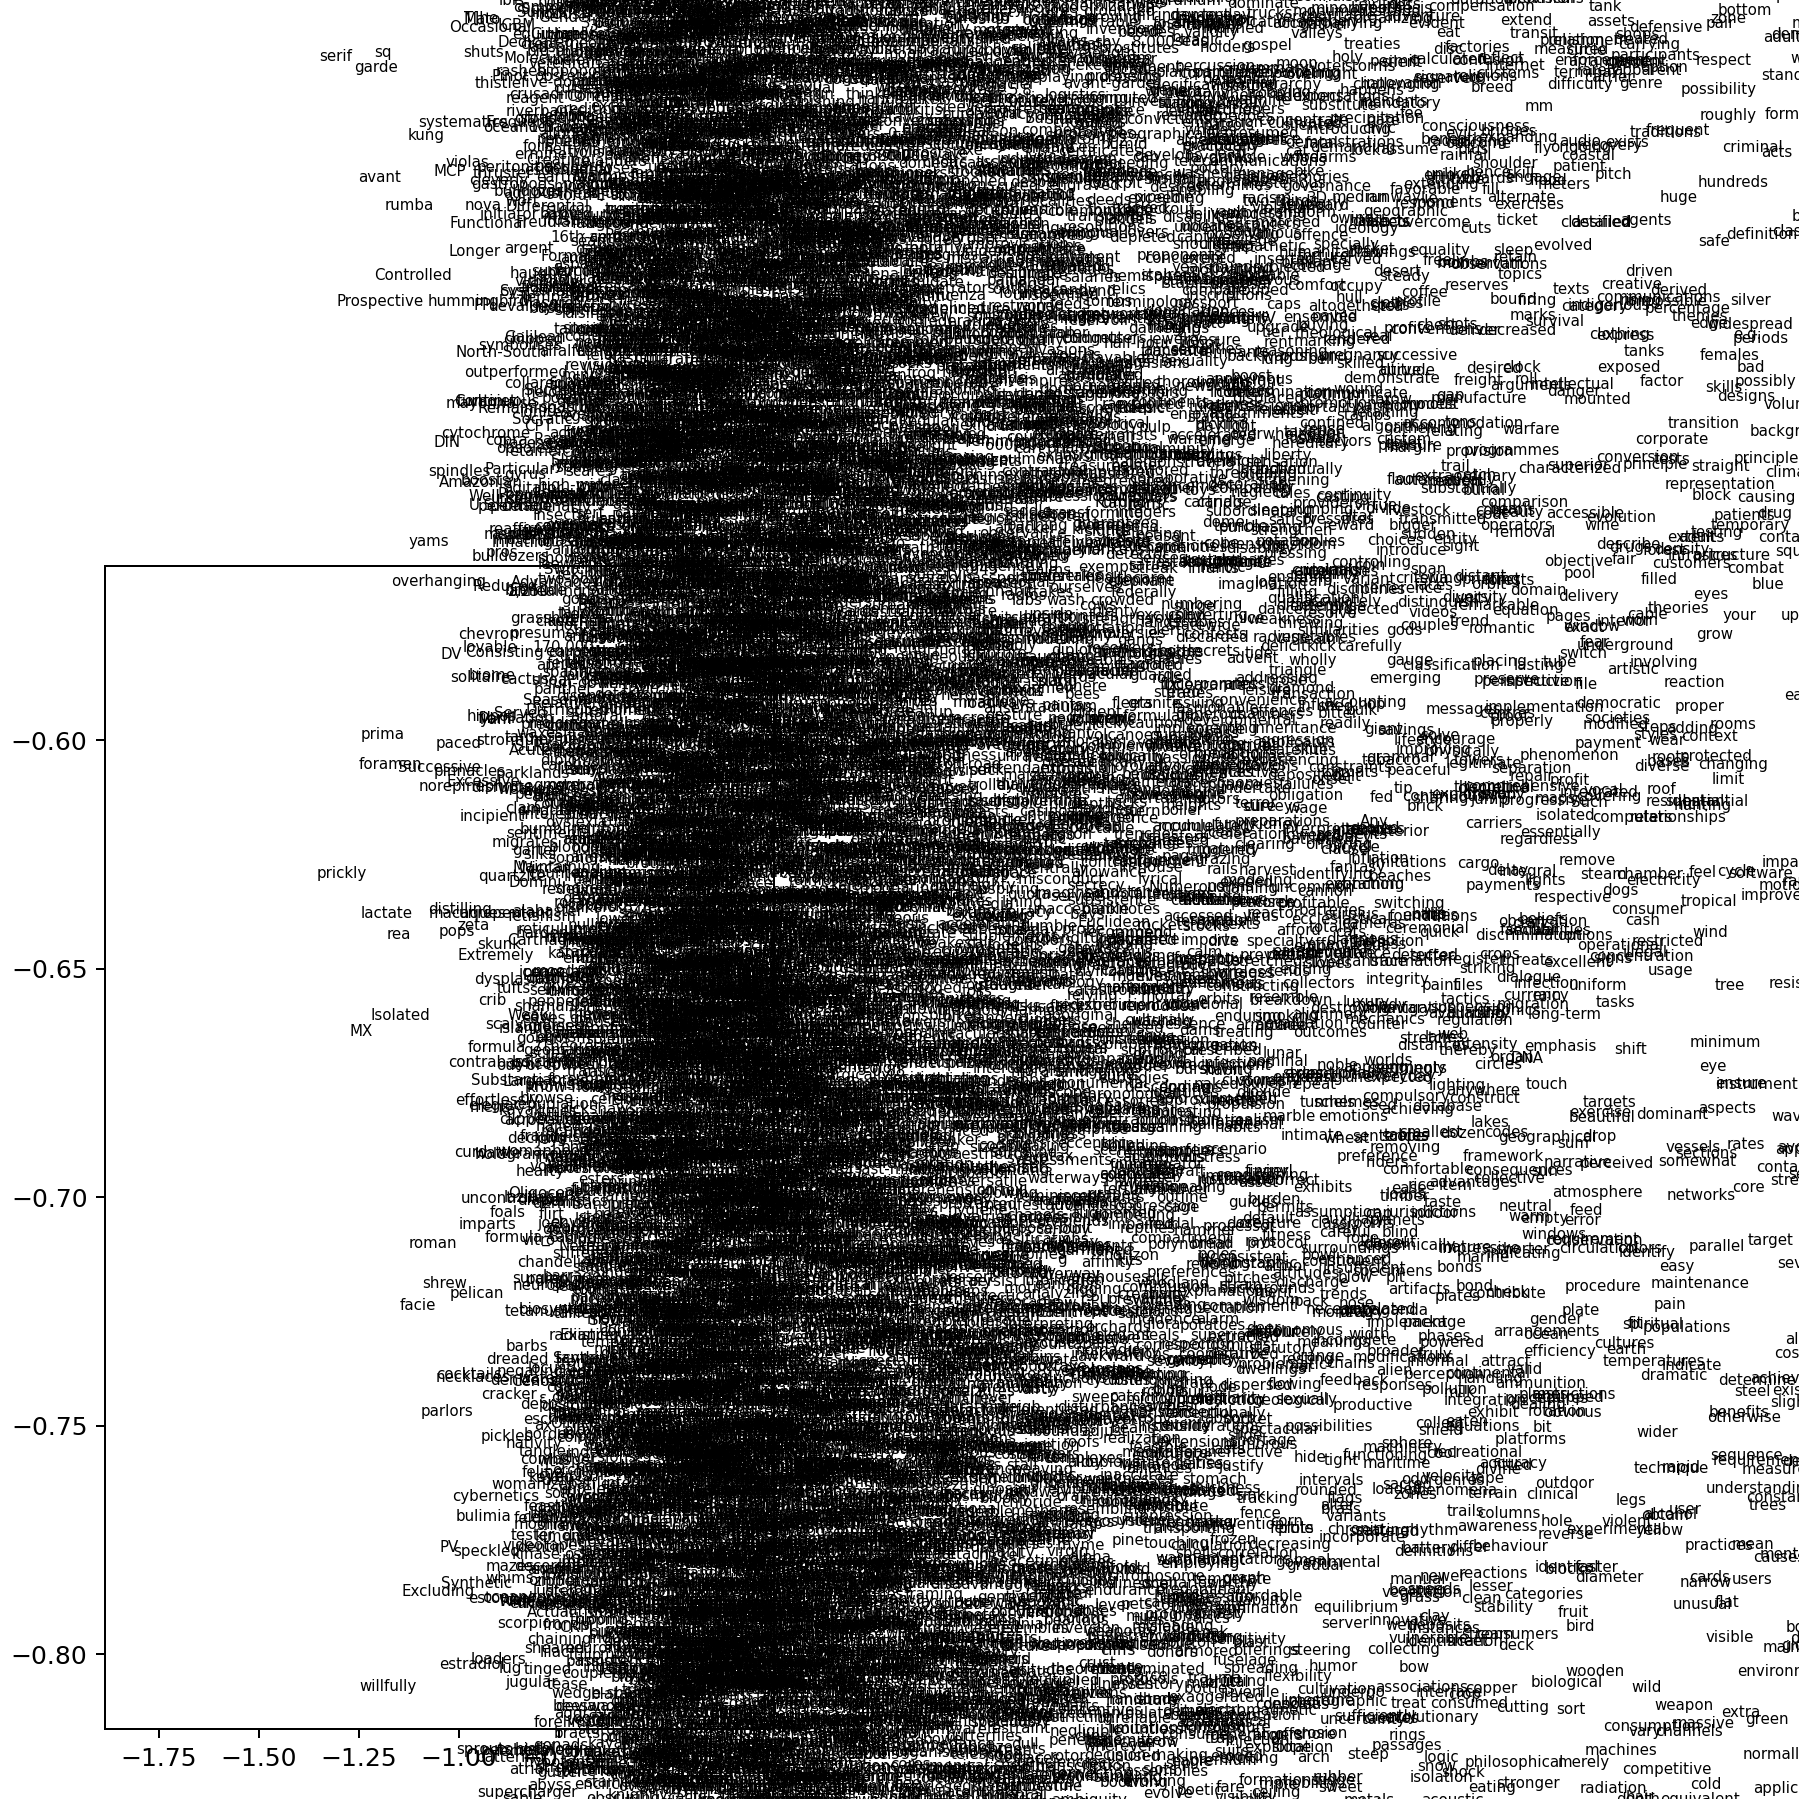

In [120]:
plot_text(pca_result_2D_wiki, list(glove.model.keys()) )

In [143]:
import inflect

indexes_2 = {}
p = inflect.engine()
for integer in range(1, 100):
    value = p.number_to_words(integer)
    try:
        indexes_2[value] = list(glove.model.keys()).index(value)
    except:
        print()

In [134]:
pca_result_2D_wiki.shape

(50004, 2)

In [136]:
np.array(list(indexes.values()))

array([   46,    55,   103,   168,   282,   392,   744,   830,  1310,
         888,  3978,  2692,  5899,  6129,  4530,  6105,  9741,  5245,
       12343,  3173, 19327, 27758, 38179, 24650, 21327, 27200, 42086,
        5065, 43782, 33837, 39117, 47179,  6780, 42393, 33543,  5680,
        6809, 14686, 16475, 21533])

<IPython.core.display.Javascript object>


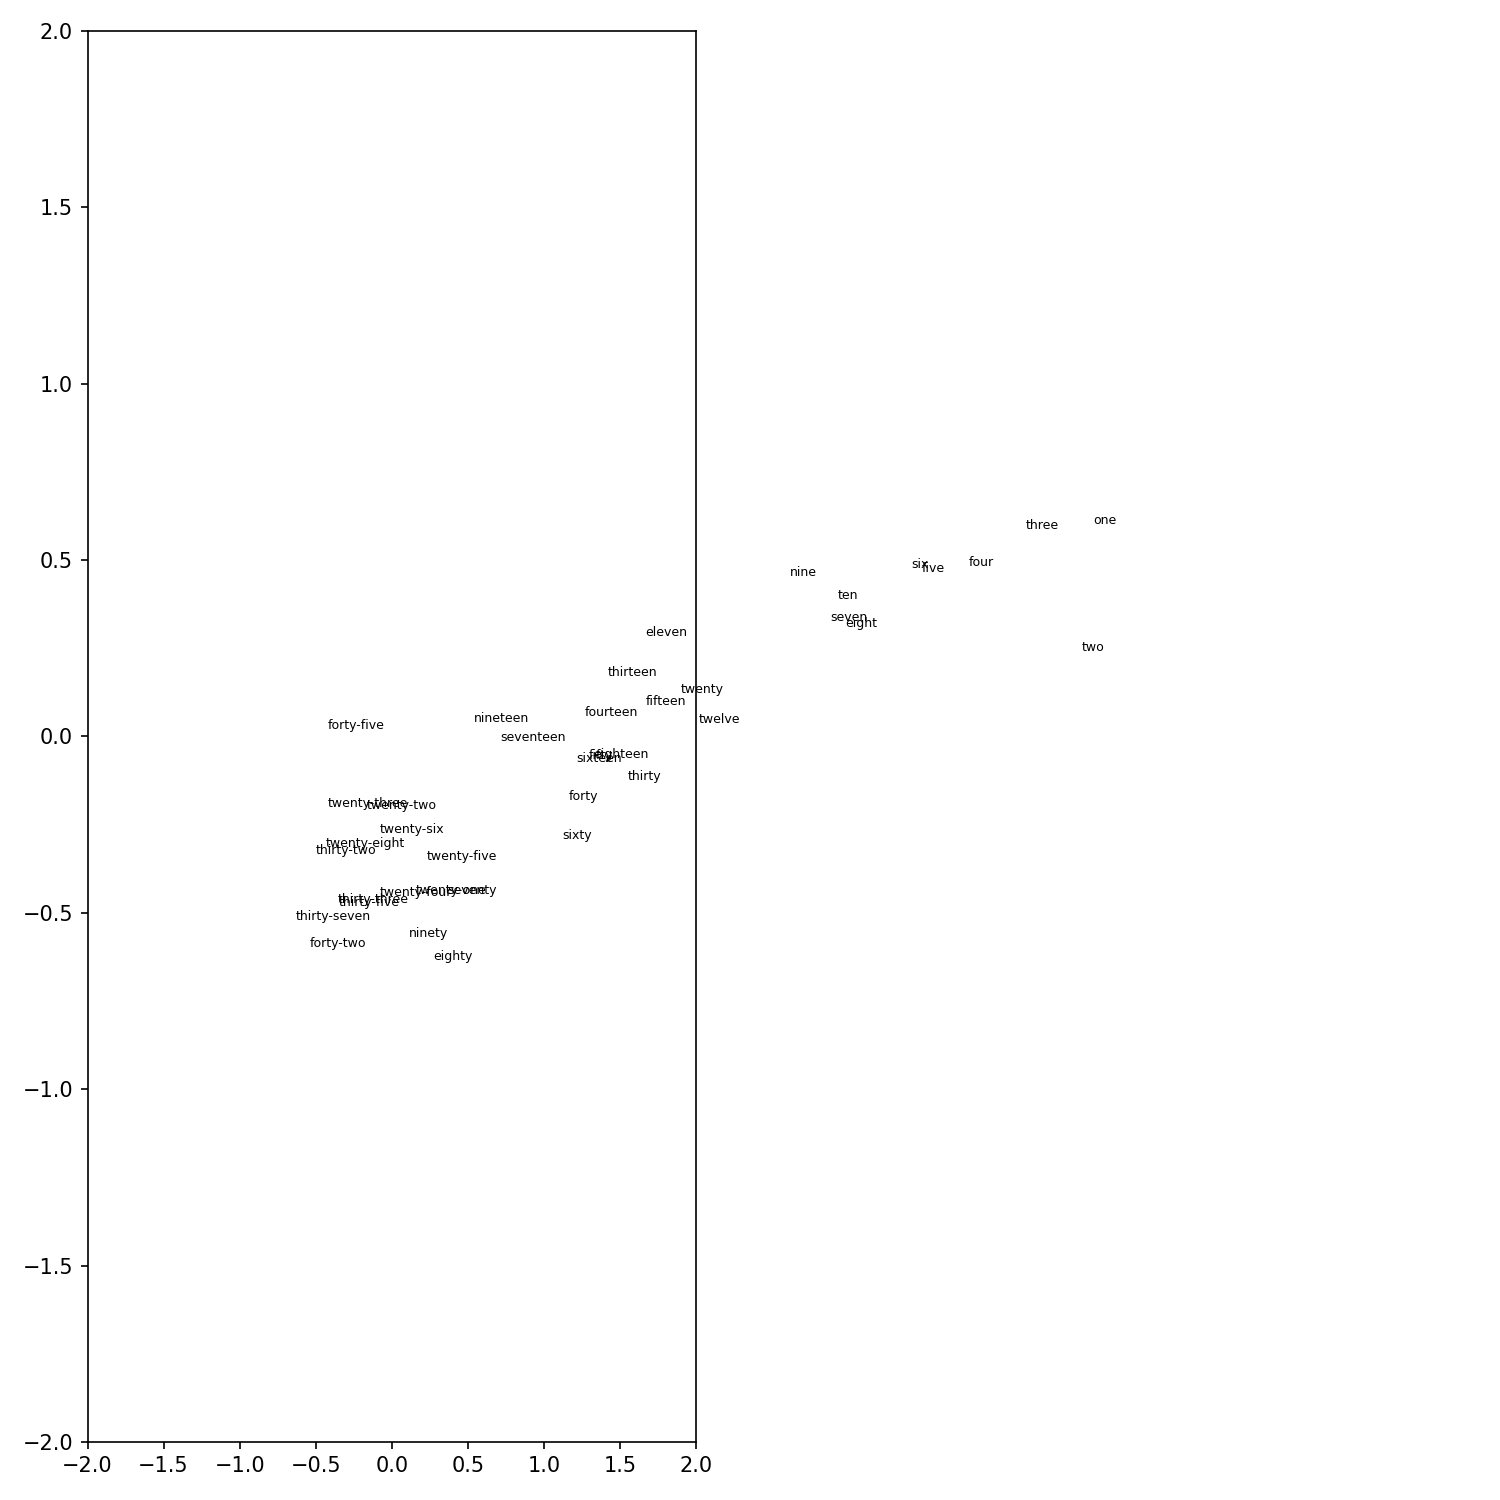

In [137]:
plot_text(pca_result_2D_wiki[np.array(list(indexes.values())), :], list(indexes.keys()) )

<IPython.core.display.Javascript object>


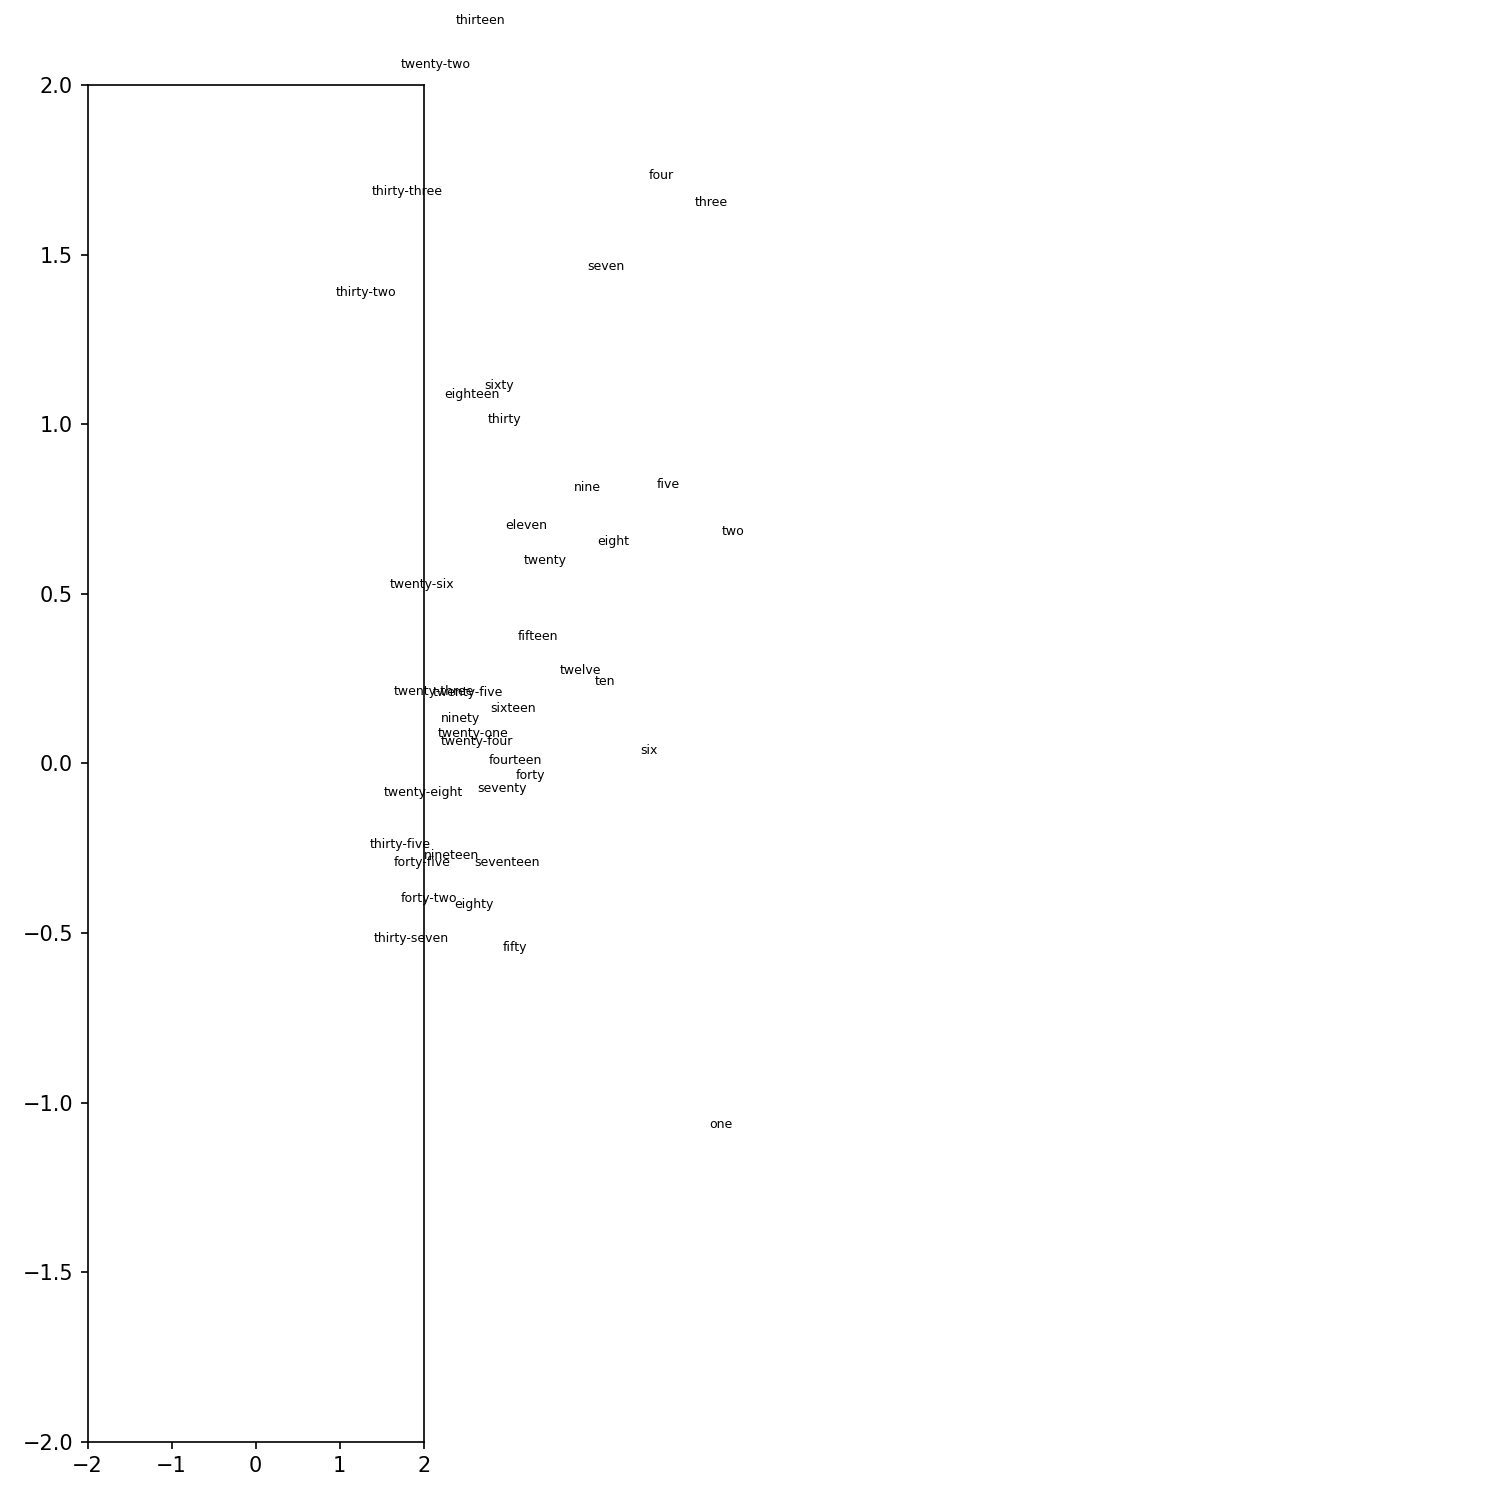

In [145]:
plot_text(pca_result_2D_wiki_giga[np.array(list(indexes.values())), :], list(indexes.keys()) )

<IPython.core.display.Javascript object>


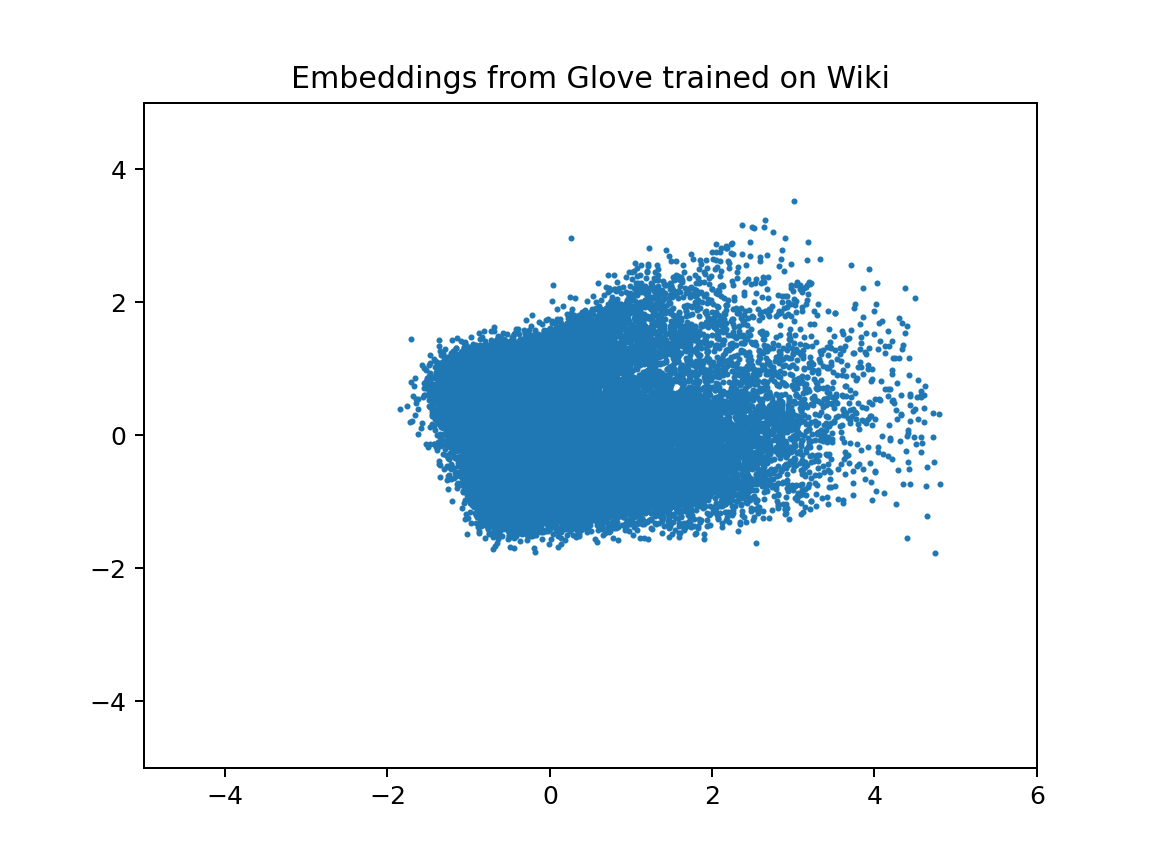

In [75]:
plot_reduction(
    pca_result_2D_wiki, 
    plot_type='2D', 
    reduction_type='PCA', 
    title='Embeddings from Glove trained on Wiki',
    x_lim=(-5,6),
    y_lim=(-5,5),
    **kwargs)

<IPython.core.display.Javascript object>


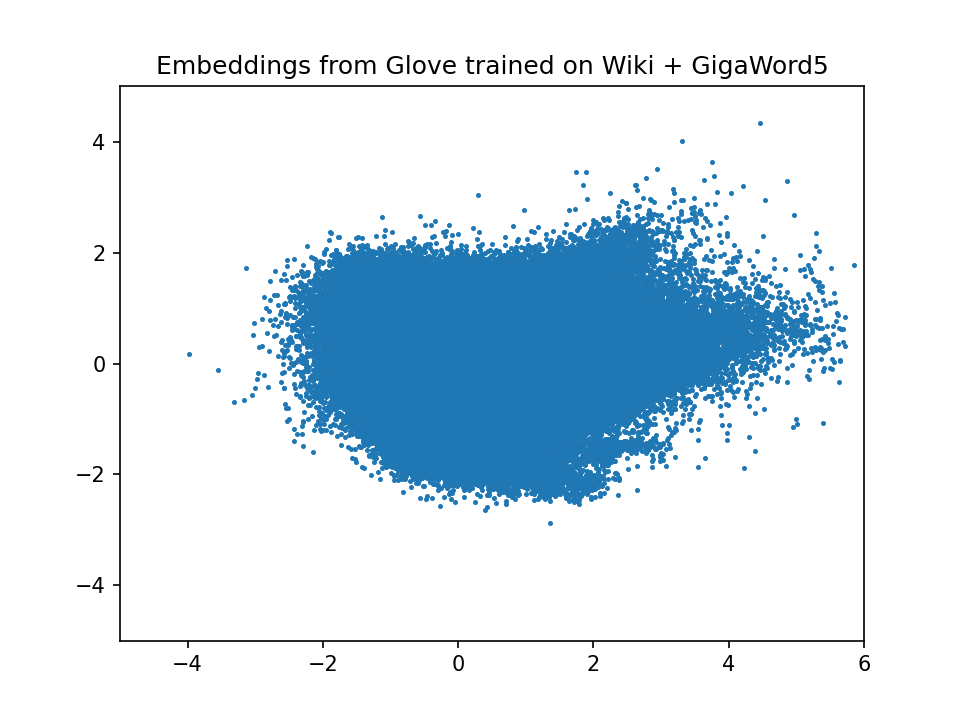

In [142]:
pca_2D_wiki_giga = PCA(n_components=2, random_state=1111)
pca_result_2D_wiki_giga = pca_2D_wiki_giga.fit_transform(data_wiki_giga.values)
kwargs = {
    's':2,
    #'c':'density',
    'cmap':'Spectral'
}
plot_reduction(
    pca_result_2D_wiki_giga, 
    plot_type='2D', 
    reduction_type='PCA', 
    title='Embeddings from Glove trained on Wiki + GigaWord5',
    x_lim=(-5,6),
    y_lim=(-5,5),
    **kwargs)

In [16]:
extractor = GloveExtractor(vocab_path, 'english', **kwargs)
iterator_list = [tokenize(path, language, train=False, vocab=extractor.model.model) for path in paths]

100%|██████████| 207/207 [00:00<00:00, 74327.62it/s]

Tokenizing...
Preprocessing...
Preprocessed.
Tokenized.
Tokenizing...
Preprocessing...
Preprocessed.
Tokenized.
Tokenizing...
Preprocessing...
Preprocessed.
Tokenized.
Tokenizing...
Preprocessing...
Preprocessed.
Tokenized.
Tokenizing...
Preprocessing...
Preprocessed.
Tokenized.
Tokenizing...
Preprocessing...
Preprocessed.
Tokenized.
Tokenizing...
Preprocessing...
Preprocessed.
Tokenized.
Tokenizing...
Preprocessing...
Preprocessed.
Tokenized.
Tokenizing...
Preprocessing...
Preprocessed.
Tokenized.


In [17]:
len(vocab)

400000

In [18]:
len([item for l in iterator_list for item in l])

19908

In [19]:
len([item for l in iterator_list for item in l if item =='<unk>'])

0

## Activation extraction

In [20]:
for index, config in enumerate(config_paths):
    extractor = GloveExtractor(vocab_path, 'english', **kwargs)
    print(extractor.name, ' - Extracting activations ...')
    for run_index, iterator in tqdm(enumerate(iterator_list)):
        print("############# Run {} #############".format(run_index))
        check_folder(saving_path_folders[index])
        activations  = extractor.extract_activations(iterator)
        
        transform(activations, saving_path_folders[index], 'activations', run_index, embedding_size=300)
        #activations.to_csv(os.path.join(saving_path_folders[index], 'activations_run{}.csv'.format(run_index + 1)), index=False)
        
        

0it [00:00, ?it/s]
100%|██████████| 1894/1894 [00:00<00:00, 455975.88it/s]

GLOVE_embedding-size_300_language_english  - Extracting activations ...
############# Run 0 #############



1it [00:01,  1.15s/it]
100%|██████████| 2093/2093 [00:00<00:00, 273717.83it/s]


############# Run 1 #############


2it [00:02,  1.12s/it]
100%|██████████| 2297/2297 [00:00<00:00, 263175.16it/s]


############# Run 2 #############


3it [00:03,  1.07s/it]
100%|██████████| 2152/2152 [00:00<00:00, 296308.26it/s]


############# Run 3 #############


4it [00:04,  1.00s/it]
100%|██████████| 2065/2065 [00:00<00:00, 353332.43it/s]


############# Run 4 #############


5it [00:04,  1.05it/s]
100%|██████████| 2404/2404 [00:00<00:00, 235355.65it/s]


############# Run 5 #############


6it [00:06,  1.02s/it]
100%|██████████| 2435/2435 [00:00<00:00, 227986.92it/s]


############# Run 6 #############


7it [00:07,  1.06s/it]
100%|██████████| 2038/2038 [00:00<00:00, 249147.21it/s]


############# Run 7 #############


8it [00:08,  1.04s/it]
100%|██████████| 2530/2530 [00:00<00:00, 269925.70it/s]


############# Run 8 #############


9it [00:09,  1.08s/it]


In [29]:
vocab_path = '/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/text/english/glove_training/GloVe/train.new'


In [16]:
result = []
#data = open(vocab_path, 'r').read()
#text = data.split()

for key in extractor.model.model.keys():
    if 'unk' in key:
        result.append(key)

In [17]:
np.unique(np.array(result))

array(['absolutepunk', 'absolutepunk.net', 'anarcho-punk', 'batmunkh',
       'batmunkha', 'blaupunkt', 'blunk', 'blunkett', 'brunk', 'brunken',
       'brunker', 'bunk', 'bunka', 'bunkbeds', 'bunked', 'bunker',
       'bunkered', 'bunkering', 'bunkerlike', 'bunkers', 'bunkeya',
       'bunkhouse', 'bunkhouses', 'bunkie', 'bunking', 'bunkley',
       'bunkmate', 'bunkmates', 'bunko', 'bunks', 'bunkum', 'bunky',
       'bunkyo', 'bunkyō', 'chipmunk', 'chipmunks', 'chunk', 'chunked',
       'chunkier', 'chunkin', 'chunking', 'chunklet', 'chunks', 'chunky',
       'clunk', 'clunked', 'clunker', 'clunkers', 'clunkier',
       'clunkiness', 'clunking', 'clunky', 'countersunk', 'cowpunk',
       'crunk', 'cuttyhunk', 'cyberpunk', 'cyberpunks', 'cypherpunk',
       'cypherpunks', 'dance-punk', 'debunk', 'debunked', 'debunker',
       'debunkers', 'debunking', 'debunks', 'deutschlandfunk', 'drunk',
       'drunk-driving', 'drunkard', 'drunkards', 'drunken', 'drunkenly',
       'drunkenness', '

In [28]:
np.unique(np.array(result))

array(['<unk>', 'Bunker', 'Dunkin', 'Dunkirk', 'Funk', 'Garfunkel',
       'Junkers', 'Plunkett', 'Punk', 'Trunk', 'Tunku', 'bunk', 'bunker',
       'bunkers', 'chunk', 'chunks', 'drunk', 'drunken', 'drunkenness',
       'dunk', 'funk', 'funky', 'junk', 'punk', 'punks', 'shrunk',
       'skunk', 'skunks', 'sunk', 'sunken', 'trunk', 'trunks',
       'unknowingly', 'unknown', 'unknowns'], dtype='<U11')

In [31]:
np.unique(np.array(result))

array(['<raw_unk>', 'Bunker', 'Dunkin', 'Dunkirk', 'Funk', 'Garfunkel',
       'Junkers', 'Plunkett', 'Punk', 'Trunk', 'Tunku', 'bunk', 'bunker',
       'bunkers', 'chunk', 'chunks', 'drunk', 'drunken', 'drunkenness',
       'dunk', 'funk', 'funky', 'junk', 'punk', 'punks', 'shrunk',
       'skunk', 'skunks', 'sunk', 'sunken', 'trunk', 'trunks',
       'unknowingly', 'unknown', 'unknowns'], dtype='<U11')